<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/070_correlation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(correlation-causation-notebook)=
# Lo studio delle cause dei fenomeni

Per assicurare l'integrità e la validità scientifica dei modelli statistici, è essenziale abbinarli a un'analisi causale. La pura osservazione dei dati può rivelare correlazioni e pattern nei dati, ma senza un'indagine sulle cause che stanno dietro a queste correlazioni, le conclusioni tratte possono essere fuorvianti o incomplete.

Anche nell'ambito di una discussione sull'*analisi descrittiva* dei dati (e, forse, soprattutto in un tale contesto), è importante sottolineare le limitazioni di un tale approccio. L'aspetto cruciale da tenere a mente è che le cause dei fenomeni non possono essere inferite *solamente* dall'analisi dei dati. Né dall'analisi descrittiva dei dati che stiamo discutendo adesso, né dall'analisi inferenziale dei dati che discuteremo in seguito. Pertanto, per giungere ad una comprensione dei fenomeni è necessario integrare il processo di modellazione statistica con una comprensione delle cause sottostanti del fenomeno oggetto d'esame. In altre parole, per una comprensione scientificamente valida, è necessario combinare la modellazione statistica e con l'analisi causale.

In questo capitolo, ci concentreremo sull'introduzione dei concetti fondamentali dell'analisi causale, i quali costituiscono una base cruciale per l'interpretazione dei dati. Cominceremo con la distinzione chiara e universalmente riconosciuta tra correlazione e causalità. La correlazione indica una relazione tra due variabili, mettendo in evidenza la loro forza e direzione, mentre la causalità implica un legame di causa ed effetto tra le variabili. È di importanza cruciale comprendere che il fatto che due variabili siano correlate non implica automaticamente l'esistenza di un rapporto causale tra di esse. Il noto principio "correlazione non implica causalità" sottolinea questa distinzione critica. Numerosi esempi di correlazioni che non sono basate su una relazione causale diretta possono essere esaminati sul sito [spurious correlations](https://tylervigen.com/spurious-correlations).

Oltre a questo concetto fondamentale, procederemo quindi ad esplorare una serie di concetti introdotti da Judea Pearl nel suo testo "Causality" {cite:p}`pearl2009causality`. Questi concetti sono essenziali per descrivere le relazioni tra variabili. Essi includono strutture di relazione come biforcazioni, catene, collider e strutture discendenti. Questa cornice concettuale ci permetterà di discernere tra i diversi tipi di legami causali tra le variabili, ponendo così le basi per condurre un'analisi dei dati più completa e accurata.

Mediante esempi numerici, dimostreremo l'importanza dei fattori confondenti nell'analisi della correlazione e della covarianza. Questo passo ci condurrà oltre l'analisi delle relazioni bivariate di base, introducendoci alle dinamiche più complesse che regolano le relazioni tra le variabili.

## Preparazione del Notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
import graphviz

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Introduzione alla Ricerca Causale 

L'inferenza causale è un processo cruciale nella previsione degli effetti di un intervento. Essa non solo permette di anticipare le conseguenze di una causa, ma anche di costruire scenari controfattuali, immaginando gli esiti alternativi che sarebbero potuti accadere se fossero state prese decisioni diverse. Questo tipo di ragionamento si rivela fondamentale anche in contesti puramente descrittivi, come nell'analisi di un campione di studio rispetto alla popolazione generale. Per comprendere le ragioni di eventuali discrepanze tra campione e popolazione, è necessario adottare un approccio causale che vada oltre la semplice descrizione dei dati, fornendo un modello causale che spieghi le differenze osservate.

{cite:t}`McElreath_rethinking` utilizza l'analogia dei Golem, robot di argilla potenti ma privi di saggezza e previsione, per descrivere un approccio limitante che è stato a lungo lo standard in psicologia. 

```{figure} ../images/mcelreath_golem.png
---
height: 600px
name: golem-fig
---
Esempio di albero decisionale per la selezione di una procedura statistica appropriata. Iniziando dall'alto, l'utente risponde a una serie di domande riguardanti la misurazione e l'intento, arrivando infine al nome di una procedura. Sono possibili molti alberi decisionali simili.  (Figura tratta da {cite:t}`McElreath_rethinking`).
```

Questo approccio si concentra sul semplice test delle ipotesi nulle e non stabilisce una relazione chiara tra le problematiche causali della ricerca e i test statistici. Tale limitazione è stata considerata come una delle cause principali della crisi della replicabilità dei risultati nella ricerca psicologica (si veda il capitolo {ref}`generalizability-crisis-notebook`) e, di conseguenza, della crisi della psicologia stessa.

Uno dei problemi messi in evidenza da McElreath nel suo lavoro "Statistical Rethinking" {cite:p}`McElreath_rethinking` è che processi causali completamente distinti possono generare la stessa distribuzione di risultati osservati. Pertanto, un approccio focalizzato esclusivamente sul test dell'ipotesi nulla non è in grado di distinguere tra questi diversi scenari. Questa constatazione è dimostrata in modo numerico nel capitolo dedicato all'inferenza causale {ref}`causal-inference-notebook`.

Questa limitazione dell'approccio tradizionale viene paragonata da McElreath a un "Golem" nella data science, una metafora che fa eco a una creatura mitologica senza vita, potente ma stupida. Questo approccio è stato particolarmente diffuso in psicologia per decenni, nonostante sia stato dimostrato che è caratterizzato una bassa sensibilità, il che significa che è poco in grado di rilevare le caratteristiche cruciali dei fenomeni studiati. Inoltre, ha un alto tasso di falsi positivi, cioè tende a concludere erroneamente che ci sono differenze quando in realtà non esistono. Questa problematica è discussa, ad esempio, nel lavoro di {cite_t}`van2023new`.

La ricerca scientifica richiede una metodologia più sofisticata rispetto al mero "Golem" che si limita a confutare ipotesi nulle. È invece essenziale sviluppare modelli causali generativi e modelli statistici che siano solidamente basati su tali modelli generativi e rispondano alle domande di ricerca. Inoltre, è di fondamentale importanza avere una strategia razionale per l'estrazione delle stime dei modelli e per la quantificazione dell'incertezza associata ad esse. In questo contesto, l'analisi bayesiana dei dati si presenta come un approccio altamente efficace. In analisi semplici, le differenze rispetto all'approccio del "Golem" potrebbero sembrare minimali o addirittura introdurre alcune complicazioni. Tuttavia, quando ci si trova ad affrontare analisi più realistiche e complesse, la differenza diventa sostanziale.

Per condurre un'analisi scientifica dei dati che superi l'approccio "amatoriale" rappresentato dai "Golem", {cite:t}`McElreath_rethinking` suggerisce di seguire una serie di passaggi chiave:

1. Comprensione del concetto teorico oggetto della stima. Questo richiede la costruzione di una solida base teorica e una definizione chiara del fenomeno oggetto dell'analisi.

2. Sviluppo di modelli causali che descrivano accuratamente le relazioni tra le variabili coinvolte nel problema di ricerca. Questi modelli devono essere basati sulla teoria sottostante.

3. Utilizzo delle informazioni ottenute dai passaggi precedenti per formulare modelli statistici appropriati. Questi modelli dovrebbero riflettere fedelmente il contesto scientifico e le relazioni causali che sono state identificate.

4. Esecuzione di simulazioni basate sui modelli causali per verificare se i modelli statistici sviluppati siano in grado di stimare correttamente ciò che è teoricamente atteso. Questa fase di verifica è cruciale per garantire la validità dei modelli.

5. Infine, condurre l'analisi dei dati effettivi utilizzando i modelli statistici sviluppati, avendo la fiducia che questi modelli riflettano accuratamente le teorie sottostanti e le relazioni causali. 

Un elemento chiave sottolineato da {cite:t}`McElreath_rethinking` nel processo di analisi è l'utilizzo dei "Directed Acyclic Graphs" (DAG), che rappresentano uno strumento essenziale per realizzare il flusso di lavoro descritto. I DAG forniscono una rappresentazione grafica dei modelli causali, consentendo una visualizzazione chiara delle relazioni tra le variabili coinvolte. Questi grafici rendono trasparenti le assunzioni alla base dell'analisi, creando una connessione evidente tra le teorie sottostanti e l'analisi statistica. In contrasto, l'approccio dei "Golems" è caratterizzato dall'assenza di ipotesi sulle relazioni sottostanti tra le variabili. Questo rende difficile comprendere e interpretare le implicazioni scientifiche dei risultati ottenuti, poiché manca un collegamento chiaro tra le teorie e l'analisi statistica. Per un approfondimento, si veda il primo capitolo di [Statistical Rethinking](https://xcelab.net/rm/statistical-rethinking/).

### I Disegni di Ricerca e la Causalità

Per comprendere meglio l'uso dei DAG nell'inferenza causale, faremo riferimento alla trattazione fornita da un articolo di {cite:p}`rohrer2018thinking` relativo alla ricerca sulla causalità nei disegni osservazionali.

**Disegni Osservazionali**
Nei disegni osservazionali, i ricercatori osservano e registrano gli eventi senza intervenire direttamente. A differenza degli esperimenti controllati, qui non si manipolano le variabili studiate, ma si osservano le relazioni naturali che emergono. Questi studi sono preziosi quando gli esperimenti non sono fattibili per motivi etici o pratici. Tuttavia, i disegni osservazionali, sebbene efficaci nell'identificare correlazioni e tendenze, spesso mancano della capacità di stabilire con certezza relazioni causali, a causa di variabili confondenti e bias di selezione. Esempi comuni di disegni osservazionali includono studi trasversali e longitudinali.

**Disegni Sperimentali**
I disegni sperimentali, d'altra parte, si basano sulla manipolazione controllata delle variabili e sulla randomizzazione. Quest'ultima, ovvero l'assegnazione casuale dei partecipanti ai gruppi, è fondamentale per ridurre i bias e garantire la validità delle conclusioni causali. Gli esperimenti randomizzati sono considerati il gold standard per indagare le relazioni causali, in quanto la randomizzazione consente di bilanciare gli effetti delle variabili osservate e non osservate tra i diversi gruppi di trattamento.

**Confronto e Considerazioni**
Sebbene gli esperimenti offrano un elevato grado di sicurezza nella determinazione delle relazioni causali, i disegni osservazionali presentano vantaggi in termini di flessibilità e applicabilità in situazioni in cui gli esperimenti non possono essere condotti per motivi etici o pratici. Tuttavia, va notato che, da un lato, i disegni osservazionali spesso si basano su relazioni associative piuttosto che causali, e d'altro canto, gli esperimenti potrebbero non consentire una generalizzazione al di là delle condizioni artificiali del laboratorio.

**Definizione della Causalità**
Nel contesto della ricerca, il concetto di causalità si riferisce a come una variabile (X) possa influenzare o determinare un'altra variabile (Y). Il linguaggio causale si serve di termini come "causa", "influenza" e "determina", a differenza di termini descrittivi come "associato" o "correlato", che semplicemente indicano relazioni senza implicare un legame causale diretto. Va notato che la causalità è concepita come un concetto probabilistico, il che significa che una variazione in X aumenta la probabilità di un certo risultato in Y, piuttosto che determinarlo in modo assoluto.

Nella pratica della ricerca psicologica e sociale, spesso è necessario dedurre relazioni causali da dati osservazionali, poiché gli esperimenti randomizzati non sono sempre fattibili o eticamente accettabili. Di conseguenza, i ricercatori devono affrontare sfide e limitazioni, cercando di inferire relazioni causali in modi alternativi, sottolineando la complessità dell'analisi causale in contesti reali.

**Strategie di Ricerca nei Dati Osservazionali**

Nell'ambito della ricerca che si basa su dati osservazionali, gli studiosi si confrontano con diverse sfide che possono compromettere l'integrità e l'accuratezza delle inferenze tratte dai loro studi. Per affrontare tali sfide e accrescere la robustezza delle loro analisi, i ricercatori impiegano una varietà di strategie metodologiche.

1. **Uso di interventi surrogati.** Questa tecnica si rivela particolarmente utile in situazioni dove la manipolazione diretta di una variabile di interesse risulta impraticabile o non etica. Piuttosto che intervenire direttamente, i ricercatori si avvalgono di variabili surrogate (o proxy), ovvero variabili che si presume siano in relazione con la variabile di interesse principale. L'obiettivo è di esplorare e dedurre l'effetto indiretto di una variabile su un'altra, stabilendo così associazioni che, pur non essendo dirette, possono fornire insight significativi sul fenomeno in esame.

Tuttavia, l'approccio surrogato comporta delle sfide intrinseche. La principale tra queste è la difficoltà nel garantire una relazione diretta tra la variabile surrogata e la variabile di interesse. La validità delle inferenze tratte tramite variabili surrogate dipende fortemente dalla solidità dell'associazione tra queste e le variabili di interesse principali. 

2. **Linguaggio prudente nell'interpretazione dei dati**: I ricercatori utilizzano un linguaggio cauto quando interpretano dati osservazionali. Ciò significa che evitano di fare affermazioni causali dirette quando i dati mostrano solo correlazioni. 

3. **Utilizzo di metodi statistici avanzati per controllare variabili confondenti**: Le variabili confondenti sono fattori esterni che possono influenzare il rapporto tra le variabili studiate. L'uso di tecniche statistiche, come la regressione multipla o l'analisi di matching, aiuta a controllare l'effetto di queste variabili confondenti, permettendo una stima più accurata del rapporto tra le variabili di interesse. Tuttavia, questi metodi hanno limiti (come vedremo nel capitolo {ref}`causal-inference-notebook`) poiché potrebbero non riuscire a controllare completamente tutte le variabili confondenti, soprattutto in situazioni complesse.

{cite:t}`rohrer2018thinking` sottolinea che, nonostante l'adozione di queste strategie, persistono sfide in termini di validità esterna (cioè la generalizzabilità dei risultati) e interpretazione dei dati. La validità esterna può essere limitata poiché le condizioni specifiche dello studio potrebbero non rappresentare situazioni più ampie o diverse. Inoltre, l'interpretazione dei risultati può essere complicata dalla natura indiretta o surrogata delle evidenze raccolte.

## Modelli Causali Grafici

L'uso di dati osservazionali per trarre inferenze causali presenta sfide significative, ma con le giuste precauzioni e approcci metodologici, è possibile ottenere insight causali preziosi. In questo contesto, {cite:t}`rohrer2018thinking` evidenzia l'importanza dei DAG come strumento chiave per la rappresentazione visiva delle ipotesi causali. Questi diagrammi non solo facilitano la comprensione delle relazioni causali tra variabili ma offrono anche una guida per la corretta identificazione e trattamento delle variabili esterne, spesso chiamate "variabili di confondimento".

Una delle funzioni più rilevanti dei DAGs è la loro capacità di identificare quali variabili di confondimento devono essere considerate nell'analisi e quali possono essere omesse senza compromettere l'integrità dell'inferenza causale. Questa caratteristica è essenziale, dato che sia il controllo insufficiente sia quello eccessivo delle variabili di confondimento possono portare a conclusioni errate (questo punto verrà approfondito nel capitolo {ref}`causal-inference-notebook`). In particolare, i DAGs aiutano a discernere quando l'aggiustamento per certe variabili di confondimento può migliorare l'accuratezza delle inferenze causali e quando, al contrario, tale aggiustamento potrebbe introdurre distorsioni.

Grazie ai DAGs, i ricercatori possono esplicitare le loro ipotesi sulle relazioni causali tra le variabili, minimizzando così il rischio di incorrere negli errori comuni legati all'interpretazione di dati osservazionali. Questo approccio permette di elaborare una strategia di analisi più informata e metodologicamente solida, con l'obiettivo di avvicinarsi il più possibile alla comprensione delle dinamiche causali sottostanti.

### Importanza delle Assunzioni

È cruciale comprendere che non è possibile estrapolare conclusioni causali meramente da dati correlazionali senza un solido fondamento di conoscenze preliminari. Questo principio nasce dalla consapevolezza che una correlazione osservata può essere attribuibile a un'ampia gamma di fattori, inclusa la potenziale influenza di variabili terze non considerate nell'analisi. Di conseguenza, qualsiasi tentativo di inferenza causale privo una comprensione preliminare delle possibili relazioni causali rischia di essere fallace.

Nonostante tali sfide, è fondamentale non demordere di fronte alla complessità intrinseca della ricerca osservazionale. Sebbene questi studi non possano dimostrare inequivocabilmente la causalità a causa della loro intrinseca limitazione nel manipolare direttamente le variabili di interesse, mantengono un ruolo insostituibile nell'ambito scientifico. Gli studi osservazionali sono preziosi per la generazione di ipotesi e per orientare le ricerche future verso domande scientifiche rilevanti. Analogamente, anche gli studi sperimentali, pur essendo considerati il gold standard per la determinazione delle relazioni causali, non sono immuni da presupposti. Gli esperimenti, specialmente quelli condotti in ambienti altamente controllati come i laboratori, presuppongono che i risultati ottenuti siano generalizzabili oltre i confini dello studio, un'assunzione che non trova sempre conferma nella realtà.

In questo contesto, l'elemento distintivo di un'indagine rigorosa, sia essa osservazionale che sperimentale, risiede nella capacità di riconoscere, articolare e comunicare apertamente le assunzioni su cui si basa. Questo approccio non solo facilita una valutazione critica delle conclusioni causali da parte della comunità scientifica ma stimola anche un dialogo costruttivo e produttivo all'interno della stessa, essenziale per il progresso della conoscenza. La trasparenza nell'esposizione delle ipotesi permette di gettare le fondamenta per un avanzamento scientifico che sia informato, consapevole e, soprattutto, veritiero.

## Introduzione ai DAG

I DAGs vengono impiegati per analizzare l'effetto causale di una variabile su un'altra. Consideriamo come esempio {cite:p}`rohrer2018thinking` l'effetto dell'istruzione sul reddito. Immaginiamo di dividere il livello di istruzione in due categorie: laurea o nessuna laurea entro i 30 anni. Successivamente, misuriamo il reddito a 40 anni. È importante sottolineare che non possiamo dedurre direttamente che il possesso di una laurea causa un aumento del reddito, poiché esistono numerose altre variabili che possono influenzare il reddito.

I DAGs ci aiutano a visualizzare questa complessa rete di relazioni causali in modo chiaro. In un DAG, le frecce rappresentano le relazioni causali tra le variabili, e l'assenza di cicli ricorsivi garantisce che le relazioni siano direzionali, ovvero vanno da una variabile all'altra senza creare loop causali.

Nel nostro esempio, il livello di istruzione può influenzare il reddito, ma ci sono anche altri fattori da considerare, come l'intelligenza, ad esempio. Un DAG ci permetterà di rappresentare queste relazioni in modo chiaro, mostrando come il livello di istruzione può avere un impatto indiretto sul reddito attraverso altre variabili.

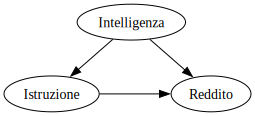

In [4]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge("Istruzione", "Reddito")

# Visualizza il DAG
f

Nel DAG illustrato nella figura precedente, l'associazione tra il livello di istruzione e il reddito è complicata da una variabile terza, cioè l'intelligenza. Il modello causale che emerge da questo DAG suggerisce che l'intelligenza influenza sia il livello di istruzione che il reddito. Queste ipotesi di causalità sono rappresentate dalle frecce che si estendono dall'intelligenza alle altre variabili nel diagramma. Inoltre, notiamo che c'è una freccia che collega direttamente il livello di istruzione al reddito, indicando che, oltre all'effetto causale dell'intelligenza, si assume che anche il livello di istruzione abbia un impatto causale diretto sul reddito.

### Caratteristiche dei DAG

I DAG forniscono dunque delle rappresentazioni grafiche che illustrano le relazioni causali ipotizzate tra le variabili. In un DAG, ogni nodo rappresenta una variabile, mentre le frecce indicano le relazioni causali tra di esse. La manipolazione sperimentale di una variabile all'origine di una freccia (per esempio, l'intervento sul livello di istruzione) si presume abbia effetti sulla variabile verso cui la freccia punta (in questo caso, il reddito). In un DAG, ogni variabile deve essere collegata tramite una freccia ad almeno un'altra variabile verso cui esercita un'inflenza causale; la direzione della freccia stabilisce la direzione di tale relazione causale.

I DAG sono considerati strumenti qualitativi: una freccia che va da A a B indica che A ha un qualche tipo di effetto su B, ma non specifica la natura esatta o l'intensità di questa relazione. Diversamente dai modelli di equazioni strutturali (SEM), i DAG non includono frecce bidirezionali, ma solo monodirezionali, per sottolineare la direzione univoca dell'influenza causale.

### Relazioni Complesse

I DAG sono costituiti da una serie di nodi e frecce che vengono impiegati per visualizzare situazioni intricate e per tracciare percorsi causali tra le variabili. Per esemplificare ulteriormente questo concetto, nel DAG presente nella figura successiva, abbiamo introdotto un nuovo nodo, "voti scolastici", che è influenzato dall'intelligenza e, a sua volta, influisce sul livello di istruzione.

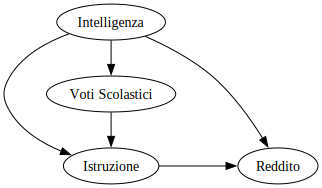

In [15]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi "Istruzione" e "Reddito" al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Aggiungi il nodo "Voti Scolastici"
f.node("Voti Scolastici")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge(
    "Intelligenza", "Voti Scolastici"
)  # Aggiungi relazione tra Intelligenza e Voti Scolastici
f.edge(
    "Voti Scolastici", "Istruzione"
)  # Aggiungi relazione tra Voti Scolastici e Istruzione
f.edge("Istruzione", "Reddito")

f

### Tipi di Percorsi

Nei DAGs, i percorsi rappresentano le connessioni causali ipotizzate tra le variabili, delineate attraverso frecce che indicano la direzione dell'effetto presunto. Un percorso semplice connette direttamente due nodi, per esempio, da "intelligenza" a "reddito", suggerendo che l'intelligenza influisce direttamente sul reddito. Percorsi più complessi possono includere più nodi, come nel caso di "intelligenza → istruzione → reddito", dove l'istruzione agisce come una variabile mediatrice che trasmette l'effetto dell'intelligenza sul reddito.

Un percorso può anche andare contro la direzione indicata dalle frecce, come nel caso di istruzione ← voti ← intelligenza → reddito. I percorsi che vanno contro la direzione delle frecce richiedono un'attenzione particolare. Nei DAGs, un percorso che procede contro la direzione delle frecce indica generalmente una relazione di confondimento o una dipendenza condizionale tra le variabili, piuttosto che un effetto causale.

## Strutture Causali Elementari

All'interno dei DAG, si possono riconoscere quattro tipologie fondamentali di strutture causali: catene, biforcazioni, biforcazioni invertite, e discendenti.  La comprensione di queste strutture causali di base è fondamentale per analizzare i percorsi causali più complessi. 

```{figure} ../images/four_confounders.png
---
height: 250px
name: four-confounders-fig
---
I quattro confondenti di base.  (Figura tratta da {cite:t}`McElreath_rethinking`).
```


### Catene

Le catene (X → Z → Y), conosciute anche come sequenze causali o *pipe*, sono strutture rappresentate dalla successione X $\rightarrow$ Z $\rightarrow$ Y, dove una variabile intermedia Z trasmette l'effetto causale da X a Y. Questa struttura riflette una vera e propria catena di causalità. Un esempio potrebbe essere: intelligenza (X) influisce sul livello di istruzione (Z), che a sua volta influisce sul reddito (Y). In questa catena, il livello di istruzione agisce come un mediatore tra intelligenza e reddito.

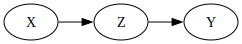

In [5]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Z", "Y")
f.attr(rankdir='LR')
f

In sintesi,

- $X$ e $Y$ sono associati: $X \not\perp Y$. 
- L'influenza di $X$ sulla $Y$ viene trasmessa mediante $Z$. 
- Se stratifichiamo i dati in base a $Z$, l'associazione scompare: $X \perp Y \mid Z$.

### Biforcazioni

Le  biforcazioni, rappresentate dalla struttura $X \leftarrow Z \rightarrow Y$, giocano un ruolo cruciale nell'analisi causale, poiché evidenziano situazioni in cui una variabile comune $Z$ funge da causa antecedente per due variabili distinte, $X$ e $Y$. Questo schema non denota una relazione causale diretta tra $X$ e $Y$, ma indica piuttosto che entrambe sono influenzate da $Z$, una causa comune. Questa configurazione è essenziale per capire il fenomeno del *confondimento*, che si verifica quando una correlazione osservata tra $X$ e $Y$ può essere attribuita alla presenza di $Z$.

Per illustrare meglio questo concetto, prendiamo in esame le variabili rappresentate dal livello di istruzione ($X$) e dal reddito ($Y$), tra cui si osserva una correlazione. Questa correlazione, tuttavia, non implica necessariamente un legame di causalità diretta tra istruzione e reddito. Potrebbe invece emergere dall'influenza di una terza variabile, come l'intelligenza ($Z$), che agisce come causa comune influenzando sia $X$ che $Y$.

In questa situazione, l'associazione percepita tra istruzione e reddito non deriva da un'influenza diretta dell'una sull'altro, ma piuttosto dall'influenza esercitata dall'intelligenza su entrambe. Introducendo il concetto di *condizionamento*, ovvero l'analisi dei dati tenendo conto dei diversi livelli di intelligenza, è possibile chiarire la natura di questa associazione. Condizionando su $Z$ (l'intelligenza), e quindi esaminando i dati all'interno di gruppi che condividono lo stesso livello di intelligenza, l'associazione apparente tra istruzione e reddito potrebbe attenuarsi o scomparire del tutto. Questo processo dimostra che la correlazione inizialmente osservata tra istruzione e reddito non è il risultato di un effetto diretto tra queste variabili, ma piuttosto l'effetto di una causa comune.

Il condizionamento, quindi, permette di stratificare i dati in base a $Z$, isolando l'effetto delle variabili di interesse da quello delle cause comuni. Questa metodologia è fondamentale per discernere le relazioni causali autentiche da quelle che appaiono meramente correlazionali a causa di confondimenti, offrendo una comprensione più precisa delle dinamiche causali sottostanti.

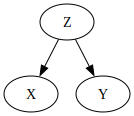

In [25]:
f = graphviz.Digraph()
f.edge("Z", "X")
f.edge("Z", "Y")
f

In sintesi, 

- $X$ e $Y$ sono associati: $X \not\perp Y$. 
- L'associazione osservata deriva dal fatto che entrambe le variabili condividono una causa comune, $Z$. 
- Se stratifichiamo i dati in base a $Z$, l'associazione scompare: $X \perp Y \mid Z$.

### Biforcazioni invertite

Le biforcazioni invertite, note anche come *collider*, presentano una configurazione specifica in cui due variabili, $X$ e $Y$, convergono influenzando una terza variabile, $Z$, formando una struttura $X \rightarrow Z \leftarrow Y$. In questo schema, $X$ e $Y$ sono considerate variabili indipendenti, il che significa che non esiste una relazione causale diretta o un'influenza reciproca evidente tra di loro. Nonostante $X$ e $Y$ confluiscano su $Z$, non si può dedurre l'esistenza di un legame causale diretto tra $X$ e $Y$ basandosi esclusivamente sulla loro comune influenza su $Z$.

Un concetto chiave da comprendere è che, sebbene $X$ e $Y$ abbiano un impatto su $Z$, ciò non implica automaticamente una relazione causale tra $X$ e $Y$. Tuttavia, analizzando specificamente i casi in cui $Z$ manifesta determinate caratteristiche, si potrebbe incorrere erroneamente in ciò che è conosciuto come il *bias del collider*. Questo tipo di bias si verifica quando la selezione di casi basata su $Z$ introduce un'associazione artificiale tra $X$ e $Y$, che non riflette le relazioni presenti nell'intera popolazione.

Per illustrare questo fenomeno con un esempio pratico, consideriamo il talento musicale ($X$), il supporto familiare ($Y$), e il successo in una carriera musicale ($Z$). Il talento e il supporto familiare possono influenzare positivamente il successo musicale, ma non necessariamente implica che esista una relazione diretta tra il talento di una persona e il supporto familiare che riceve. Tuttavia, se ci concentriamo esclusivamente sulle persone che hanno raggiunto il successo musicale ($Z$), potremmo erroneamente percepire un'associazione tra talento e supporto familiare, un'associazione che potrebbe non essere presente o essere significativamente diversa nell'intera popolazione, che include individui talentuosi non riusciti a ottenere successo.

La comprensione delle biforcazioni invertite e del bias del collider è essenziale per evitare interpretazioni errate dei dati e conclusioni causali fuorvianti. Questo è particolarmente importante in studi dove variabili potenzialmente collider sono coinvolte, richiedendo un'analisi attenta per identificare e gestire correttamente queste strutture complesse nell'elaborazione delle inferenze causali.

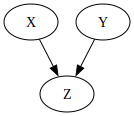

In [27]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Y", "Z")
f

In sintesi, 

- $X$ e $Y$ non sono associati: $X \perp Y$. 
- Sia $X$ che $Y$ influenzano $Z$. 
- Se stratifichiamo i dati in base a $Z$, emerge un'associazione spuria: $X \not\perp Y \mid Z$.

### Il Discendente

Questa configurazione è caratterizzata dalla presenza di una variabile, denominata $Z$, che riceve l'influenza da una variabile precedente, $X$, e trasmette tale effetto a una variabile successiva, $Y$. Inoltre, $Z$ esercita un'influenza diretta su un'altra variabile, identificata come $A$. Pertanto, $Z$ agisce sia come mediatore nella relazione causale tra $X$ e $Y$, sia come collegamento causale diretto con $A$. La struttura risultante può essere rappresentata come $X \rightarrow Z \rightarrow Y$, con una ramificazione aggiuntiva da $Z$ ad $A$ ($Z \rightarrow A$).

In questa configurazione:
- **$X$** è la variabile indipendente che provoca un cambiamento in $Z$.
- **$Z$** funge da variabile mediatrice, trasmettendo l'effetto di $X$ su $Y$ e influenzando simultaneamente $A$.
- **$Y$** è la variabile dipendente, influenzata da $Z$.
- **$A$** è una variabile direttamente influenzata da $Z$, e quindi considerata una variabile discendente.

Una variabile discendente come $A$ può teoricamente agire come mediatore in relazioni causali aggiuntive, potenzialmente con un'altra variabile che indicheremo come $B$. $B$ può avere un'interazione (diretta o indiretta) con $Y$, complicando l'analisi causale tra $X$ e $Y$. Di conseguenza, condizionare statisticamente su $A$ potrebbe interferire con la corretta identificazione dell'effetto causale di interesse.

Inoltre, i discendenti di $A$, come $D$, possono agire da collider, ovvero variabili influenzate da più cause. Se $D$ è influenzato da una causa comune non osservata con $Y$ (indicata come $U$), condizionare su $D$ potrebbe introdurre un bias nell'analisi, aprendo un percorso non causale ($A \rightarrow D \leftarrow U \rightarrow Y$).

L'inclusione di $A$ nel modello, in qualità di discendente di $Z$, indica che la stima della relazione tra $X$ e $Y$ può essere influenzata da altre variabili intermedie. Escludendo $A$ e altri discendenti simili dal modello causale, si evita la confusione causata da queste variabili intermedie, isolando meglio l'effetto di $X$ su $Y$.

Concludendo, è cruciale aderire alla condizione del criterio del backdoor, che prescrive di escludere i discendenti dalle variabili controllate per prevenire il confondimento. Ciò garantisce che le variabili considerate nell'analisi non siano influenzate da $A$, consentendo così una stima imparziale dell'effetto causale di $X$ su $Y$.

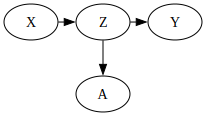

In [7]:
f = graphviz.Digraph()

with f.subgraph() as s:
    s.attr(rank='same')  # Assicura che X, Z, e Y siano sullo stesso livello
    s.edge("X", "Z")
    s.edge("Z", "Y")

f.edge("Z", "A")  

f

In sintesi, 

- $X$ e $Y$ sono associati in maniera causale attraverso $Z$: $X \not\perp Y$. 
- $A$ fornisce informazioni su $Z$. 
- Se stratifichiamo i dati in base ad $A$, l'associazione tra $X$ e $Y$ si indebolisce (o scompare): $X \perp Y \mid A$.

## Irreversibilità e Aciclicità nei DAG

Nei DAG i percorsi ciclici non sono ammessi. Ciò implica che una variabile non può diventare sua stessa antenata, eliminando così la possibilità di un'influenza causale su se stessa. Questa caratteristica garantisce la coerenza e la validità delle analisi causali basate su tali diagrammi. Ad esempio, nel DAG precedente, non si può invertire il percorso da intelligenza a reddito, poiché ciò creerebbe un percorso ciclico (intelligenza → istruzione → reddito → intelligenza).

Questa restrizione può sembrare controintuitiva, specialmente in psicologia dove spesso esistono cicli di feedback. Ad esempio, l'intelligenza può influenzare l'istruzione, ma anche l'istruzione può influenzare l'intelligenza. Tuttavia, tali cicli di feedback possono essere modellati in un DAG considerando l'ordine temporale e aggiungendo nodi per misurazioni ripetute.

Per esempio, un DAG potrebbe rappresentare come l'intelligenza nell'infanzia influenzi l'istruzione, che a sua volta influenza l'intelligenza in età adulta. La risoluzione temporale in un DAG può essere ulteriormente "ingrandita", con valutazioni annuali, mensili o addirittura giornaliere di molteplici variabili, portando all'aggiunta di sempre più nodi nel DAG. Questo permette di modellare la dinamica temporale e i cambiamenti nelle relazioni causali nel tempo, pur mantenendo la struttura aciclica del grafico.

In sintesi, anche se i DAG sono aciclici e non permettono cicli diretti, possono comunque rappresentare sistemi dinamici e complessi con relazioni causali che cambiano nel tempo, attraverso una rappresentazione più dettagliata e stratificata del tempo e delle variabili.

## Il Confondimento nei Dati Osservazionali

La principale sfida nei dati osservazionali riguarda il confondimento. Questo fenomeno si manifesta quando c'è una causa comune o più cause che influenzano sia la variabile indipendente, che rappresenta la potenziale causa di interesse, sia la variabile dipendente, che rappresenta il risultato di interesse. L'influenza concomitante di queste variabili può dar luogo a ciò che spesso viene definito una correlazione spuria, la quale non deve essere confusa con un effetto causale.

Esaminiamo ora una simulazione che chiarisce il concetto di correlazione spuria. Denotiamo con `c` una variabile di confondimento.

In [6]:
c = np.random.rand(100)

Nella simulazione, le variabili `x` e `y` sono indipendenti tra di loro dal punto di vista causale, ma entrambe sono influenzate dalla variabile `c`. Come abbiamo visto in precedenza, questa struttura casuale corrisponde ad una "biforcazione" nel DAG.

In [7]:
x = c + 0.1 * np.random.rand(100)
y = c + 0.3 * np.random.rand(100)

Esaminiamo ora la correlazione tra `a` e `c`.

In [8]:
coef, p_val = stats.pearsonr(x, y)
print(coef)

0.9617601466218078


In altre parole, anche se le variabili `x` e `y`  sono causalmente indipendenti, la presenza di una terza variabile `c` (variabile di confondimento) che le influenza entrambe fa sì che `x` e `y` risultino correlate tra di loro. Questo è un esempio di correlazione spuria.

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_58834/259294172.py:22: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.3)


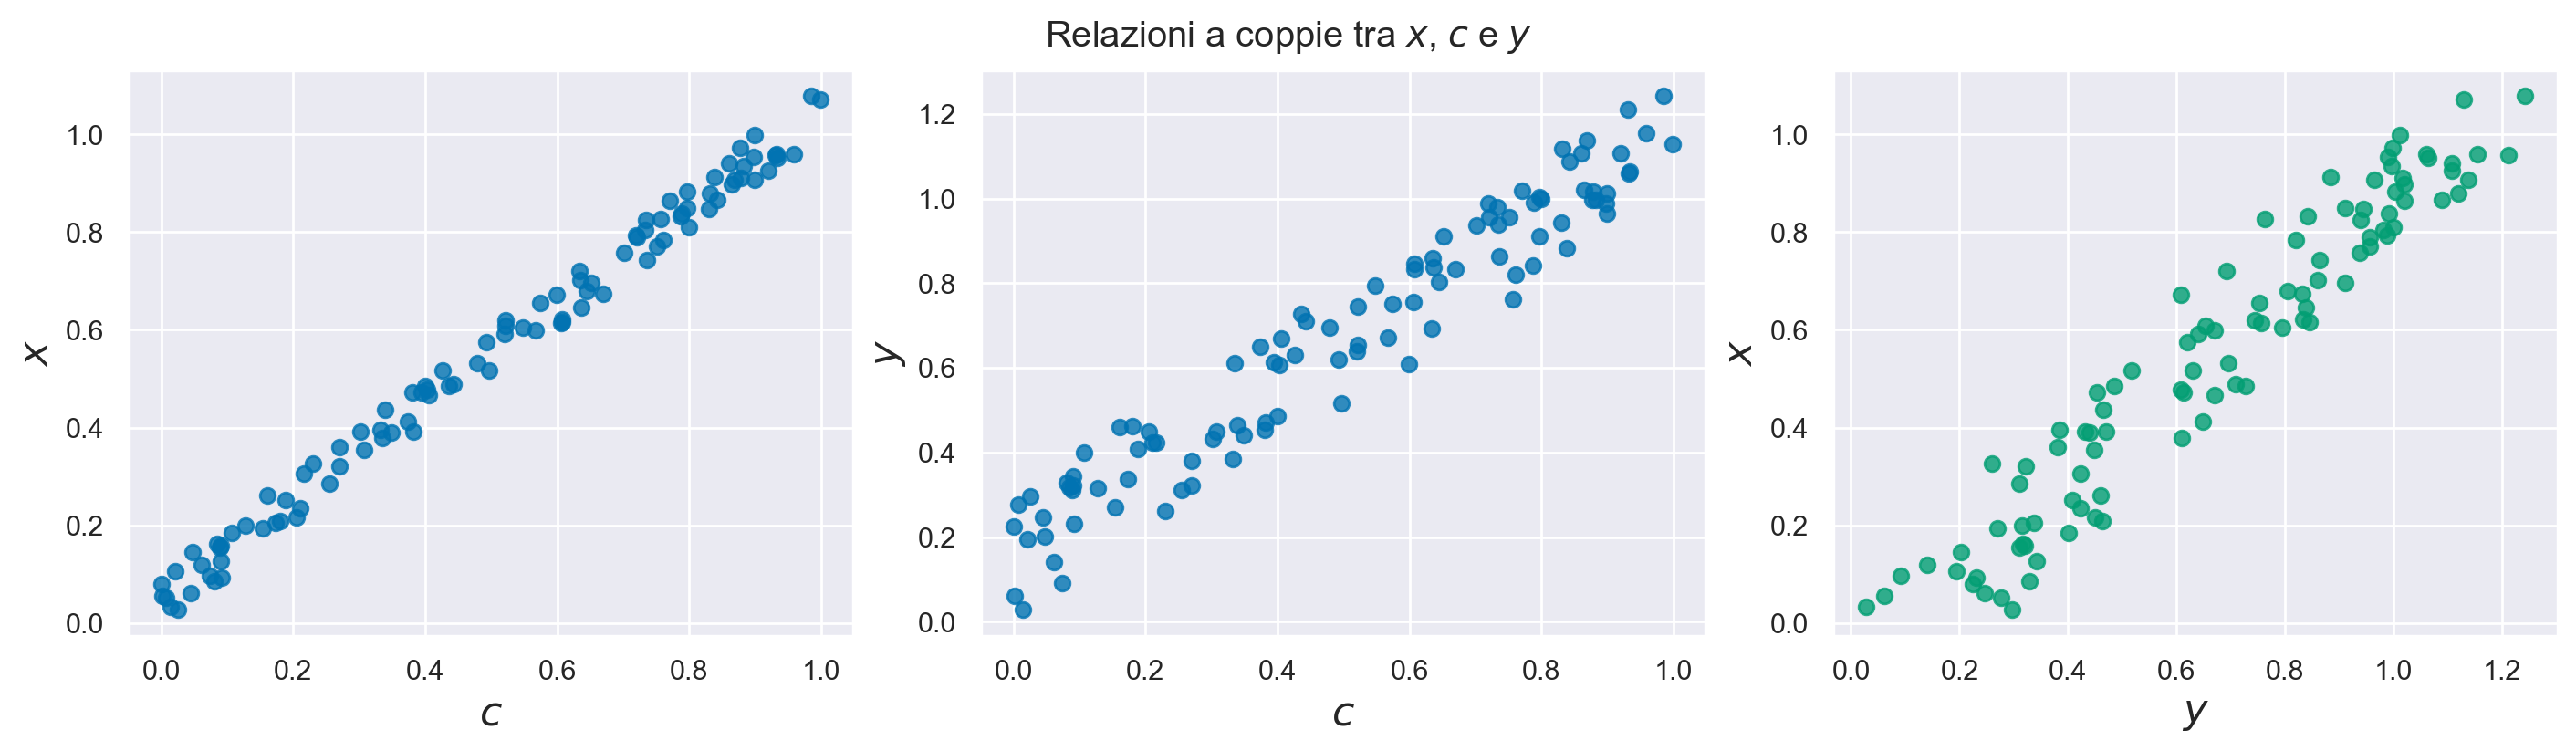

In [9]:
# Il codice è tratto da A. Molak (2023) "Causal Inference and Discovery in Python".

COLORS = ["C0", "C2"]

variables = {"x": x, "c": c, "y": y}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, (var_1, var_2) in enumerate([("c", "x"), ("c", "y"), ("y", "x")]):
    color = COLORS[1]

    if "c" in [var_1, var_2]:
        color = COLORS[0]

    ax = axes[i]
    ax.scatter(variables[var_1], variables[var_2], alpha=0.8, color=color)

    ax.set_xlabel(f"${var_1}$", fontsize=16)
    ax.set_ylabel(f"${var_2}$", fontsize=16)

plt.suptitle("Relazioni a coppie tra $x$, $c$ e $y$")
plt.subplots_adjust(wspace=0.3)
plt.show()

In conclusione, quando osserviamo l'associazione tra due variabili, $X$ e $Y$, una tale associazione potrebbe non essere una conseguenza della diretta relazione causale tra $X$ e $Y$, ma piuttosto un effetto di una terza variabile, in questo caso $C$, che è una "causa comune" per entrambe.

## Uso dei DAG per Identificare il Confondimento

I DAG possono essere utilizzati per identificare il confondimento, ossia per eliminare le associazioni spurie e assicurare l'isolamento dell'effetto causale genuino. Tuttavia, il vincolo per ottenere questo risultato è difficilmente soddisfacibile in situazioni reali, poiché richiede che il DAG contenga tutte le informazioni rilevanti relative all'effetto causale di interesse. Di conseguenza, nella pratica, i DAG non vengono impiegati principalmente per garantire l'isolamento dell'effetto causale privo di confondimenti, ma piuttosto come uno strumento per formulare e testare ipotesi sulla causalità.

Ad esempio, è possibile estendere il DAG mostrato nella figura precedente aggiungendo variabili supplementari che possono influenzare il livello di istruzione o altre variabili. Tuttavia, non tutte queste estensioni potrebbero risultare rilevanti se l'obiettivo è esaminare la relazione causale tra il livello di istruzione e il reddito. Per illustrare, una variabile che ha un impatto sul livello di istruzione ma non ha un effetto causale su altre variabili nel DAG non dovrebbe essere inclusa.

Per costruire un DAG causale completo che conduca a conclusioni causali valide, è fondamentale incorporare tutte le cause comuni di ciascuna coppia di variabili già presenti nel DAG. Ciò comporta l'inclusione di qualsiasi variabile che influenzi direttamente o indirettamente almeno due variabili nel DAG.

### Identificazione e Blocco dei Percorsi Retrostanti

In un DAG, i percorsi retrostanti, comunemente noti come "back-door", rappresentano connessioni tra variabili che possono introdurre distorsioni nelle analisi causali. Un percorso retrostante ha origine da una variabile che influenza un'altra variabile (la variabile indipendente) e prosegue fino a collegarsi alla variabile di interesse (la variabile dipendente). Tali percorsi possono suggerire un'associazione tra variabili che non è effettivamente causale, ma piuttosto è il risultato di un fattore comune che influisce su entrambe le variabili.

Per chiarire questo concetto, consideriamo il DAG esaminato in precedenza che descrive la relazione tra il livello di istruzione e il reddito. In questo DAG, emergono due percorsi retrostanti:

1. Livello di Istruzione ← Voti Scolastici ← Intelligenza → Reddito.
2. Livello di Istruzione ← Intelligenza → Reddito.

In entrambi questi casi, la variabile "Intelligenza" svolge il ruolo di intermediario tra il livello di istruzione e il reddito. Ciò implica che qualsiasi associazione osservata tra il livello di istruzione e il reddito potrebbe non essere completamente spiegata da una relazione causale diretta, ma potrebbe essere influenzata dalla presenza di un terzo fattore, ovvero l'intelligenza.

Questi percorsi sono considerati "aperti" poiché non contengono strutture che blocchino la correlazione spuria (ad esempio, biforcazioni invertite, che sono configurazioni che impediscono la trasmissione di associazioni non causali). La presenza di tali percorsi aperti può portare a interpretazioni errate della relazione tra il livello di istruzione e il reddito.

Per evitare conclusioni inaccurate, è fondamentale "bloccare" questi percorsi. Bloccare un percorso significa "controllare" le variabili in modo da eliminare l'influenza delle associazioni non causali. Nel nostro esempio, ciò può essere ottenuto controllando la variabile "Intelligenza" nelle analisi, garantendo così che le associazioni osservate tra il livello di istruzione e il reddito non siano influenzate in modo improprio da questa variabile comune.

### Controllo Statistico per Bloccare i Percorsi Retrostanti

#### Obiettivo del Controllo di Terze Variabili

La procedura di controllo delle variabili terze ha l'obiettivo di interrompere i percorsi retrostanti aperti tra le variabili coinvolte. Se è possibile bloccare tutti i percorsi retrostanti tra le variabili indipendenti e quelle dipendenti, è quindi possibile identificare l'effetto causale che connette queste variabili, anche quando i dati sono di natura puramente osservazionale. Questo principio segue il criterio del "back-door" proposto da {cite:t}`pearl2009causality`. L'identificazione di un tale effetto causale è valida, a condizione che il DAG rifletta accuratamente la rete causale sottostante.

Tuttavia, l'assunzione di aver catturato correttamente la rete causale e di aver bloccato con successo tutti i percorsi retrostanti spesso si rivela molto impegnativa, poiché implica che non siano state trascurate variabili rilevanti all'interno del grafo causale. La plausibilità di questa assunzione deve essere valutata attentamente caso per caso, poiché può variare a seconda del contesto e della complessità della rete causale in esame.

#### Come Bloccare un Percorso Retrostante

Un percorso retrostante può essere interrotto mediante il 'taglio' della trasmissione dell'associazione in qualsiasi punto del percorso, mediante il controllo statistico di un nodo. Per esempio, considerando il percorso non causale 'istruzione ← voti ← intelligenza → reddito', potremmo effettuare un controllo statistico sui 'voti'. Questa azione bloccherebbe efficacemente questo percorso retrostante, impedendo la trasmissione di un'associazione non causale. Tuttavia, potremmo anche eseguire un controllo statistico su 'intelligenza', il che interromperebbe sia questo percorso che il secondo percorso retrostante, 'istruzione ← intelligenza → reddito'.

Se il DAG nella figura riflette accuratamente la rete causale sottostante, controllare la variabile 'intelligenza' sarebbe sufficiente per identificare l'effetto causale dell'istruzione sul reddito poiché bloccherebbe tutti i percorsi retrostanti. Tuttavia, ripetiamo, è fondamentale che il DAG sia una rappresentazione fedele della realtà, poiché il successo del controllo dipende dalla sua corretta rappresentazione della struttura causale delle variabili coinvolte.

#### Pratiche per il Controllo delle Variabili in un DAG

Esistono diverse tecniche per gestire le variabili all'interno di un DAG per neutralizzare i percorsi di confondimento. Sebbene queste tecniche possano variare nella loro applicazione pratica, necessitando di diversi approcci statistici, tutte mirano all'obiettivo comune di bloccare i percorsi che potrebbero introdurre distorsioni nelle inferenze causali. Un prerequisito per poter applicare tali tecniche, è che le variabili che si intende controllare siano state effettivamente misurate e siano disponibili per l'analisi. Questo prerequisito, ossia la capacità di identificare e misurare accuratamente le variabili di confondimento, non è sempre facilmente realizzabile nella pratica di ricerca.

Inoltre, affinché il controllo di queste variabili sia efficace, è essenziale che la loro misurazione sia accurata e priva di distorsioni. Il successo del controllo statistico dipende fortemente dalla qualità dei dati raccolti sulla variabile di interesse. Misurazioni inaccurate o bias nelle variabili di confondimento possono compromettere significativamente la validità delle analisi statistiche e, di conseguenza, delle conclusioni tratte dallo studio. Pertanto, assicurare la precisione nella raccolta dei dati e l'integrità delle misurazioni delle variabili confondenti è un passo critico per garantire l'affidabilità delle inferenze causali derivate dall'analisi dei DAG.

### Come Controllare una Variabile nei Dati Osservazionali

#### Analisi Stratificata

In determinate circostanze, è praticabile suddividere il campione di studio per gestire le variabili confondenti attraverso un processo noto come "condizionare su". Ad esempio, per controllare l'effetto di una variabile categorica come il sesso biologico, si può procedere dividendo il campione in gruppi omogenei basati sul sesso. Analizzando separatamente ciascun gruppo e poi aggregando le stime risultanti in un'unica stima complessiva, si minimizza il rischio che gli effetti attribuibili al sesso biologico confondano i risultati osservati. Questa tecnica, conosciuta come analisi stratificata, è apprezzata per la sua chiarezza e la sua capacità di isolare gli effetti di specifiche variabili di confondimento.

Tuttavia, l'applicazione dell'analisi stratificata può incontrare limitazioni quando la variabile di controllo presenta molti livelli, è di natura continua, o quando è necessario tenere in considerazione multiple variabili confondenti e le loro potenziali interazioni. In tali situazioni, "condizionare su" variabili confondenti richiede strategie più complesse, come l'utilizzo di modelli di regressione multivariata, che permettono di controllare simultaneamente per diverse variabili confondenti, mantenendo la fattibilità dell'analisi anche in presenza di un elevato grado di complessità.

#### Includere Variabili Terze nei Modelli di Regressione

Nella ricerca psicologica, l'adozione di modelli di regressione multipla rappresenta un metodo diffuso per esercitare un controllo statistico. Questi modelli consentono di analizzare l'effetto della variabile dipendente non solo in relazione alla variabile indipendente di interesse ma anche tenendo conto di covariate aggiuntive. L'obiettivo è di "controllare" l'influenza di queste covariate per isolare più chiaramente l'effetto della variabile indipendente principale e, quando possibile, interrompere i percorsi di confondimento.

Tuttavia, un limite di questa prassi è l'assunzione frequente di relazioni lineari tra le variabili senza una giustificazione dettagliata. Tale presupposizione può portare a un controllo inadeguato delle covariate. Ad esempio, se l'effetto delle covariate sulla variabile dipendente e su quella indipendente non è lineare ma segue piuttosto una relazione quadratica, un semplice modello lineare potrebbe fallire nel neutralizzare completamente l'effetto delle covariate. Per affrontare adeguatamente questa sfida, sarebbe opportuno includere nel modello sia il termine lineare della covariata sia il suo termine al quadrato, per catturare accuratamente l'influenza non lineare.

Inoltre, la presenza di effetti interattivi tra le covariate e la variabile indipendente principale richiede un'attenzione particolare. Ignorare le potenziali interazioni può portare a stime degli effetti che non riflettono accuratamente la realtà. Pertanto, quando necessario, è fondamentale incorporare questi termini di interazione nel modello di regressione per assicurare che le stime degli effetti siano precise e rappresentative della complessità delle relazioni tra le variabili. 

### Il Matching come Metodo di Controllo Statistico

#### Uso del Matching per Controllare Variabili Multiple

In diverse circostanze di ricerca, emerge la necessità di considerare simultaneamente più variabili di confondimento, anziché limitarsi a una sola. Questo compito si complica ulteriormente quando si mira a controllare queste variabili senza presupporre una specifica relazione funzionale tra di esse e l'outcome di interesse, adottando quindi un approccio completamente non parametrico che evita di fare ipotesi predefinite sugli effetti delle variabili.

Il matching rappresenta una strategia efficace per gestire queste situazioni complesse, permettendo di appaiare i soggetti in modo da neutralizzare l'influenza delle variabili di confondimento. Tra i diversi metodi di matching, il matching basato sul punteggio di propensione (o propensity score matching) gode di grande popolarità nelle scienze sociali.

```{note}
Il processo di propensity score matching inizia con il calcolo del propensity score, che rappresenta la probabilità che un individuo sia stato assegnato al gruppo di trattamento, basandosi sulle sue caratteristiche di base. Questo valore può essere ottenuto mediante tecniche di regressione logistica o altri approcci statistici simili.

Successivamente, si procede con la creazione di un gruppo di controllo attraverso il matching dei propensity scores. Si cercano individui nel gruppo di controllo che abbiano propensity scores simili a quelli nel gruppo di trattamento. In altre parole, si accoppiano individui con probabilità simili di essere assegnati al gruppo di trattamento, basandosi sulle loro caratteristiche di base.

Questo processo di matching crea un gruppo di controllo "equivalente" al gruppo di trattamento in termini di caratteristiche di base, riducendo al minimo il confondimento. Una volta completato il matching, è possibile condurre un'analisi comparativa tra i due gruppi, tenendo conto delle caratteristiche di base ora bilanciate grazie al propensity score matching. Questo consente di stimare in modo più accurato l'effetto causale del trattamento o dell'intervento di interesse.

Un esempio concreto di propensity score matching è la ricerca di Jackson et al. (2012) per studiare gli effetti dell'addestramento militare rispetto al servizio civile sulla personalità. Utilizzando le covariate come l'età, il livello di istruzione e il background socio-economico, è stato calcolato il propensity score di ciascun individuo, ovvero la probabilità di scegliere l'addestramento militare piuttosto che il servizio civile. Successivamente, sono stati creati gruppi appaiati di individui che avevano scelto il servizio militare e individui che avevano scelto il servizio civile che avevano propensity scores simili. Questo processo ha garantito che i due gruppi fossero comparabili rispetto alle variabili di controllo, consentendo una stima più accurata degli effetti dell'addestramento militare sulla personalità, mentre bloccava potenziali percorsi retrostanti confondenti.
```

#### Considerazioni sul Matching

Il matching, e in particolare il matching basato sui punteggi di propensione, mira a raggiungere gli stessi obiettivi dei tradizionali metodi di controllo statistico che includono variabili di confondimento nelle analisi. Questa tecnica può offrire vantaggi nell'affinare la stima degli effetti causalità in determinate situazioni. Tuttavia, la sua efficacia non altera i principi fondamentali dell'inferenza causale. In altre parole, l'accuratezza nella determinazione degli effetti causali tramite i punteggi di propensione è limitata dalle stesse considerazioni che riguardano altri approcci di controllo statistico. Se una variabile di confondimento rilevante viene omessa o se vengono erroneamente incluse variabili irrilevanti, l'uso dei punteggi di propensione, come ogni altro metodo statistico, può non riuscire a identificare correttamente la natura causale dell'effetto in esame.

Un aspetto critico nell'impiego dei punteggi di propensione è l'accuratezza del modello statistico utilizzato per generarli. Questo modello deve riflettere fedelmente le relazioni tra le caratteristiche osservate dei partecipanti e la loro probabilità di sperimentare la condizione o il trattamento di interesse. La validità dell'approccio basato sui punteggi di propensione dipende strettamente dalla corretta specificazione di questo modello. Pertanto, è fondamentale assicurarsi che il modello catturi con precisione come le variabili di background influenzano la propensione a ricevere il trattamento, per garantire che i punteggi di propensione siano validi e che il matching basato su di essi possa fornire stime causali affidabili.

### Errore di Misurazione nelle Variabili di Confondimento e il suo Impatto

#### Influenza dell'Errore di Misurazione

L'errore di misurazione può influenzare tutti i metodi di controllo statistico. Ad esempio, considerando l'intelligenza come variabile di confondimento nelle due figure precedenti, è importante notare che l'intelligenza non può essere misurata in modo perfettamente accurato. Di conseguenza, l'aggiustamento statistico per l'intelligenza potrebbe non essere in grado di eliminare completamente la sua influenza confondente. Questo potrebbe portare a una sovrastima erronea dell'effetto dell'istruzione sul reddito a causa della persistenza di un confondimento residuo. Va notato che questo problema si applica anche al matching basato sui punteggi di propensione se i punteggi stessi sono influenzati da errori di misurazione nelle variabili utilizzate per calcolarli.

### Il Dilemma del Controllo Statistico Eccessivo

#### Pratica Comune e i suoi Limiti

In alcuni campi di ricerca, è diventata una pratica comune includere quante più covariate possibili, tanto che alcuni autori affermano di avere maggiore fiducia nei loro risultati perché il loro studio "utilizza più variabili di controllo rispetto a studi precedenti" (Tiefenbach & Kohlbacher, 2015, p. 85). Mentre è vero che non controllare per confondenti importanti può minare le conclusioni di uno studio, non è corretto affermare che semplicemente aggiungere più covariate migliorerà sempre la stima di un effetto causale. Questo approccio è chiamato da McEleath "causal salad":

> When I talk about "causal salad", this is what I mean: no consideration of how the covariates relate to one another or the treatment.

La semplice inclusione di un gran numero di covariate può comportare problemi, come l'emergere di effetti spuri. Pertanto, la selezione o l'inclusione delle covariate dovrebbe essere basata su una comprensione della struttura causale sottostante, piuttosto che su un approccio di "più è meglio".

#### Tipi di Variabili da Non Controllare

È importante distinguere tra due tipi di variabili che dovrebbero essere trattate con cautela quando si controlla il confondimento: i "collider" e i "mediatori". A differenza dei confondenti, che influenzano causalmente la variabile indipendente di interesse, i "collider" e i "mediatori" sono influenzati causalmente dalla variabile indipendente stessa. Questi sono spesso chiamati "variabili post-trattamento" poiché rappresentano fenomeni che si verificano dopo l'applicazione del trattamento o dell'intervento.

Una regola fondamentale che i ricercatori dovrebbero seguire è quella di **evitare di controllare o aggiungere tali variabili post-trattamento come covariate nei modelli di analisi** (Rosenbaum, 1984; Rubin, 1974). L'inclusione di collider o mediatori come covariate può portare a risultati distorti e interpretazioni errate. Pertanto, è cruciale essere consapevoli di queste distinzioni e delle implicazioni causali quando si progetta e si analizza uno studio di ricerca.

#### Analisi dei Rischi nel Controllo di Collider e Mediatori

Per approfondire la comprensione di questi concetti, ci avvaleremo di una simulazione numerica. Prima di procedere con l'esempio pratico, è utile ricordare la definizione di "collider". Un collider è una variabile che risulta influenzata da due o più variabili all'interno di un modello. Includere un collider come covariata in un'analisi può involontariamente aprire nuovi percorsi indiretti, detti percorsi "back-door", che introducono associazioni non reali tra le variabili in esame. Questo fenomeno può portare a conclusioni ingannevoli.

Al contrario, i "mediatori" sono variabili che fungono da ponte nel processo causale tra una variabile indipendente e una dipendente. Il controllo per un mediatore, includendolo nell'analisi, potrebbe ridurre o eliminare parte dell'effetto causale di interesse, in quanto i mediatori sono integrali alla catena causale che si intende indagare.

Per illustrare questi concetti attraverso un esempio pratico, consideriamo la relazione tra intelligenza ($X$) e creatività ($Y$) in un campione di studenti. Ipotizziamo che, nella popolazione generale degli studenti, non esista una relazione diretta tra intelligenza e creatività.

In [11]:
np.random.seed(123) # Per la riproducibilità dell'esempio

# Numero di studenti
n = 1000

# Generazione di dati simulati
intelligenza = np.random.normal(100, 15, n) # Intelligenza: distribuzione normale
creativita = np.random.normal(100, 15, n)  # Creatività: distribuzione normale

# Non c'è correlazione reale tra intelligenza e creatività
correlazione_generale = np.corrcoef(intelligenza, creativita)[0, 1]
print(f"Correlazione nella popolazione generale: {correlazione_generale}")

Correlazione nella popolazione generale: -0.03128347374134393


Proseguendo con l'esempio, immaginiamo ora che l'ammissione degli studenti a un rinomato programma artistico ($Z$) si basi su una combinazione delle loro capacità intellettuali e creative. In questo scenario, si presentano tre variabili principali:

- **Intelligenza ($X$)**: Rappresenta le capacità cognitive degli studenti.
- **Creatività ($Y$)**: Indica le capacità creative degli studenti.
- **Selezione nel programma artistico ($Z$)**: Questa variabile funge da collider, poiché la selezione degli studenti è influenzata sia dall'intelligenza che dalla creatività.

Il programma artistico tende a selezionare studenti che eccellono sia in intelligenza ($X$) che in creatività ($Y$), implicando che coloro che mostrano livelli elevati in entrambe queste dimensioni sono più propensi a essere ammessi ($Z$).

Se ci concentriamo esclusivamente sugli studenti che sono stati selezionati per il programma ($Z$), potremmo trarre erroneamente la conclusione che intelligenza e creatività siano inversamente correlate all'interno di questo gruppo. Ciò avviene perché, tra gli studenti selezionati, quelli con livelli eccezionalmente alti di intelligenza potrebbero non mostrare necessariamente i livelli più alti di creatività e viceversa, data la natura della selezione che valuta combinatamente le due caratteristiche.

In sostanza, la selezione per il programma ($Z$) introduce un collider nel nostro studio. Se includiamo questa variabile nel nostro modello di analisi, rischiamo di rilevare una relazione apparentemente negativa tra intelligenza e creatività che non riflette la realtà della popolazione generale degli studenti. L'associazione negativa osservata tra queste due variabili sarebbe quindi il risultato della modalità di selezione nel programma, non di una legittima interazione causale tra intelligenza e creatività.

In [12]:
# Creazione di un collider
selezione_programma = (intelligenza + creativita) > 180 # Collider

# Creazione di un DataFrame
data = pd.DataFrame({
    'Intelligenza': intelligenza,
    'Creatività': creativita,
    'SelezioneProgramma': selezione_programma
})

data.head()

,Intelligenza,Creatività,SelezioneProgramma
0,83.715541,88.767588,False
1,114.960182,108.513921,True
2,104.244677,110.772258,True
3,77.405579,85.009289,False
4,91.320996,107.123475,True


In [13]:
# Calcolo della correlazione nella popolazione generale
cor_gen = data['Intelligenza'].corr(data['Creatività'])
print(f"Correlazione nella popolazione generale: {cor_gen}")

# Calcolo della correlazione nel gruppo selezionato dal programma (collider)
data_selezionati = data[data['SelezioneProgramma']]
cor_selezionati = data_selezionati['Intelligenza'].corr(data_selezionati['Creatività'])
print(f"Correlazione nel gruppo selezionato: {cor_selezionati}")


Correlazione nella popolazione generale: -0.03128347374134393
Correlazione nel gruppo selezionato: -0.2557322309536501


La chiave qui è che controllare o condizionare l'analisi su un collider (in questo caso, la selezione nel programma) può introdurre un bias, creando associazioni o correlazioni che non sono reali. Questo è un esempio classico di come il controllo di un collider in un'analisi statistica possa portare a conclusioni errate.

### Il Bias del Collider nelle Procedure di Campionamento

Il bias del collider può emergere non solo dall'uso inappropriato di covariati, ma anche da specifiche procedure di campionamento, un fenomeno noto come bias di selezione endogena. Elwert e Winship (2014) hanno esaminato diverse modalità in cui questo bias si manifesta, con particolare attenzione ai contesti rilevanti in psicologia.

#### Bias di Non Risposta
Questo tipo di bias si verifica quando le variabili di interesse influenzano la probabilità di completamento di un'azione, come il completamento di un questionario. Ad esempio, in uno studio sulla relazione tra grinta e intelligenza, potremmo trovare che sia la grinta che l'intelligenza influenzano la probabilità di completare un questionario impegnativo. Se analizziamo solo i questionari completati, introduciamo un collider: il completamento del questionario stesso. Questo può portare a rilevare erroneamente un'associazione negativa tra grinta e intelligenza, dato che individui con alta grinta ma bassa intelligenza, o viceversa, potrebbero essere sovrarappresentati tra quelli che completano il questionario.

#### Bias di Attrito
Questo bias si manifesta in studi longitudinali quando si analizzano solo i dati dei partecipanti che non hanno abbandonato lo studio. Ad esempio, in uno studio sugli effetti dei problemi di salute sulla soddisfazione lavorativa, l'abbandono dello studio potrebbe essere influenzato sia dalla salute che dalle condizioni di lavoro. Se le persone con problemi di salute tendono a rimanere nello studio se hanno un lavoro meno stressante, mentre quelle in ambienti di lavoro stressanti rimangono se godono di buona salute, ciò crea un legame artificiale tra salute e ambiente di lavoro stressante nel campione residuo. L'analisi di questo gruppo selezionato potrebbe portare a sottostimare l'effetto dei problemi di salute sulla soddisfazione lavorativa.

### Problemi Correlati: Dati Mancanti e Rappresentatività nei Dati Osservazionali

#### Bias di Selezione Endogena e Dati Mancanti
Il bias di selezione endogena è strettamente legato ai problemi di dati mancanti. Il bias di non risposta e di attrito, che portano a dati mancanti, devono essere considerati attentamente per trarre conclusioni causali valide da dati osservazionali. 

#### Problema della Non Rappresentatività dei Campioni
La non rappresentatività dei campioni è un altro problema legato al bias di selezione endogena. Se, ad esempio, uno studio si concentra solo su studenti universitari, ciò introduce un bias di selezione tra tutte le variabili che influenzano la probabilità di diventare uno studente universitario, come lo status socio-economico e le capacità cognitive.

### Il Bias da Sovracontrollo: La Rimozione dei Processi di Interesse

#### Sovracontrollo e Bias

Se l'analisi dei collider può portare alla comparsa di associazioni spurie, è altrettanto importante riconoscere che il controllo dei mediatori può contribuire all'annullamento di associazioni che sono effettivamente presenti. Si può dire che si verifica un "bias da sovracontrollo" quando il controllo statistico delle variabili mediatrici elimina i processi di interesse che collegano le variabili tra loro.

Per chiarire questo concetto, prendiamo in considerazione uno scenario in cui vogliamo indagare sull'effetto dell'istruzione sull'intelligenza in età adulta. In questo contesto, l'istruzione può influenzare diversi aspetti dello sviluppo intellettuale di un individuo, sia in modo diretto che attraverso variabili mediatrici, quali l'accesso a risorse educative, il contesto socio-economico o la motivazione personale.

Se nel nostro modello statistico applichiamo un eccessivo controllo su tutte queste variabili mediatrici, potremmo erroneamente concludere che l'istruzione non ha un impatto significativo sull'intelligenza in età adulta. Questo accade perché, attraverso il controllo delle variabili mediatrici, rimuoviamo i percorsi attraverso cui l'istruzione effettivamente influenza l'intelligenza. Di conseguenza, l'effetto diretto dell'istruzione potrebbe apparire attenuato o persino assente.

### La Complessità delle Inferenze Causali sui Dati Correlazionali

La sfida di trarre inferenze causali da dati osservazionali è notevolmente complicata dalla necessità di identificare e controllare adeguatamente i fattori confondenti. Questo processo richiede un'attenta considerazione dei potenziali problemi, come il confondimento non lineare e gli errori di misurazione. Prima di raccogliere i dati, è fondamentale valutare le possibili variabili influenti per garantire che tutte le variabili rilevanti siano misurate. In questo contesto, è anche cruciale considerare quali variabili non dovrebbero essere controllate, ad esempio i collider e i mediatori.

La fase di pianificazione della raccolta dati assume un ruolo critico. I ricercatori devono anticipare come il processo di reclutamento del campione possa introdurre un bias di selezione endogena, compromettendo così la validità delle conclusioni. Frequentemente, i ricercatori si trovano di fronte a dati privi di misure affidabili dei confondenti chiave, a causa di variabili non considerate in precedenza o perché i dati sono stati raccolti da fonti terze. In questi casi, un'analisi dettagliata della rete causale sottostante può portare alla conclusione che i dati disponibili non sono sufficienti per supportare affermazioni causali. È anche importante riconoscere che, soprattutto nel campo della psicologia, i grafici causali tendono a essere molto più complessi di quanto è stato illustrato nei presenti esampi didattici. 

Le conclusioni causali più affidabili emergono da ciò che è noto come "evidenze convergenti", ossia risultati che sono stati replicati attraverso l'uso di metodologie di ricerca diverse. Sebbene gli esperimenti controllati randomizzati offrano un alto grado di fiducia nella validità interna, confermando così l'esistenza di relazioni causa-effetto all'interno dell'ambito dello studio, essi si basano su presupposti specifici che devono essere soddisfatti per estendere la validità di queste relazioni a contesti più ampi o alla realtà quotidiana. Tale necessità evidenzia limitazioni nella validità esterna, ovvero la capacità di generalizzare i risultati al di là delle specifiche condizioni sperimentali.

D'altro canto, l'adozione di una varietà di approcci metodologici, che spaziano dai disegni sperimentali ai rilevamenti osservazionali, arricchisce la comprensione delle dinamiche in esame. Questa pluralità di prospettive non solo incrementa la generalizzabilità e la rilevanza dei risultati ma anche apre la strada alla scoperta di nuovi fenomeni che meritano ulteriori indagini. In sostanza, l'integrazione di risultati derivanti da diverse metodologie di ricerca rafforza la validità esterna delle conclusioni e fornisce una base più solida per l'affermazione di relazioni causali complesse.

## Considerazioni Conclusive

Nell'ambito degli studi basati su dati osservazionali, districarsi tra le complesse maglie delle inferenze causali richiede non solo acume analitico ma anche una sensibilità particolare verso vari aspetti critici del processo di ricerca. Dall'identificazione dei fattori confondenti all'analisi accurata dei percorsi causali, passando per il delicato equilibrio tra la gestione di mediatori e collider, fino alla valutazione della robustezza interna ed esterna degli studi, ogni fase porta con sé sfide e opportunità.

Il primo passo verso un'interpretazione corretta dei dati osservazionali consiste nel saper riconoscere e gestire le variabili confondenti. Queste variabili, agendo su entrambe le variabili indipendenti e dipendenti, possono generare correlazioni ingannevoli che mascherano la vera natura delle relazioni in esame.

L'uso dei DAG emerge come uno strumento molto utile in questo territorio incerto, offrendo una rappresentazione visiva dei percorsi causali e fornendo indicazioni preziose su come evitare trappole analitiche quali il sovracontrollo o il controllo inappropriato di variabili post-trattamento.

Quando si tratta di mediatori e collider, il terreno si fa ancora più scivoloso. I mediatori, essendo ponti tra cause ed effetti, necessitano di una gestione oculata per non perdere di vista l'effetto causale che intendiamo esplorare. Allo stesso tempo, è fondamentale resistere alla tentazione di controllare indiscriminatamente i collider, poiché ciò può aprire la porta a correlazioni spurie che distorcono la realtà dei fenomeni studiati.

La questione del bilanciamento tra validità interna ed esterna ci ricorda che, sebbene gli esperimenti randomizzati possano offrire garanzie solide di validità interna, la loro capacità di parlare al mondo esterno allo studio – la validità esterna – non è da dare per scontata. Solo un approccio che valorizza la diversità metodologica, abbracciando tanto gli studi sperimentali quanto quelli osservazionali, può aspirare a rispondere in modo compiuto alle domande di ricerca che ci poniamo.

Per studiare con successo le dinamiche nascoste che regolano le relazioni tra le variabili che studiamo, è essenziale non solo un'attenta valutazione dei dati a disposizione ma anche una profonda riflessione sulle strutture causali in gioco. Integrare diversi approcci di ricerca arricchisce la nostra comprensione e ci avvicina a conclusioni causali solide e generalizzabili.

Un sommario ironico è fornito in questa vignetta [xkcd](https://www.explainxkcd.com/wiki/index.php/2560:_Confounding_Variables).

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Feb 03 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.2
seaborn   : 0.13.0
scipy     : 1.11.4
matplotlib: 3.8.2
arviz     : 0.17.0
graphviz  : 0.20.1
pandas    : 2.1.4

Watermark: 2.4.3

